In [1]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import numpy as np
import time
import lightgbm as lgb
import datetime
import time
import matplotlib.dates as mdate

from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold,GroupKFold,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from pathlib import Path
if lgb.compat.MATPLOTLIB_INSTALLED:
    import matplotlib.pyplot as plt
else:
    raise ImportError('You need to install matplotlib and restart your session for plot_example.py.')

In [2]:
###Auslesen der relevanten Sensordaten für jede der beiden Transportlinien

ID_51_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_051_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_85_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_13_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_013_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_70_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_070_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_72_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_072_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_133_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_133_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_134_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_134_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_135_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_135_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_136_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_136_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_137_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_137_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_138_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_138_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_139_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_139_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_140_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_140_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [3]:
ID_86_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_086_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_48_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_048_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_17_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_017_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_71_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_071_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_73_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_073_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_141_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_141_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_142_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_142_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_143_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_143_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_144_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_144_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_145_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_145_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_146_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_146_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_147_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_147_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_148_2020 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_148_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [ ]:
################################################################################################################################################
###### Feature Engineering #####################################################################################################################
################################################################################################################################################
###Target variable
TREE_1 = pd.DataFrame()
TREE_2 = pd.DataFrame()
TREE_1 = ID_51_2020[(ID_51_2020['CreateDateTime']>'2020-02-01 00:00:00')&(ID_51_2020['CreateDateTime']<'2020-11-01 00:00:00')]
TREE_1 = TREE_1.copy()
TREE_1.rename(columns = {'TagValue':'51_Foerderdruck'}, inplace=True)
TREE_1 = TREE_1.drop('TagId',axis = 1)


###Feature merge function
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-02-01 00:00:00')&(data['CreateDateTime']<'2020-11-01 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
    return TREE_1

def zusammen_ohneTagId(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-02-01 00:00:00')&(data['CreateDateTime']<'2020-11-01 00:00:00')]
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
    return TREE_1


###Filter feature processing
frames = [ID_133_2020.drop('TagId',axis = 1), ID_134_2020.drop('TagId',axis = 1), ID_135_2020.drop('TagId',axis = 1), ID_136_2020.drop('TagId',axis = 1), ID_137_2020.drop('TagId',axis = 1), ID_138_2020.drop('TagId',axis = 1)]
ID_133_bis_138_2020 = pd.concat(frames)
ID_133_bis_138_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_133_bis_138_2020 = ID_133_bis_138_2020.reset_index()
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop('index',axis = 1)

frames = [ID_141_2020.drop('TagId',axis = 1), ID_142_2020.drop('TagId',axis = 1), ID_143_2020.drop('TagId',axis = 1), ID_144_2020.drop('TagId',axis = 1), ID_145_2020.drop('TagId',axis = 1), ID_146_2020.drop('TagId',axis = 1)]
ID_141_bis_146_2020 = pd.concat(frames)
ID_141_bis_146_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_141_bis_146_2020 = ID_141_bis_146_2020.reset_index()
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop('index',axis = 1)


###Turbokonus feature processing
frames = [ID_139_2020.drop('TagId',axis = 1), ID_140_2020.drop('TagId',axis = 1)]
ID_139_bis_140_2020 = pd.concat(frames)
ID_139_bis_140_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_139_bis_140_2020 = ID_139_bis_140_2020.reset_index()
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop('index',axis = 1)

frames = [ID_147_2020.drop('TagId',axis = 1), ID_148_2020.drop('TagId',axis = 1)]
ID_147_bis_148_2020 = pd.concat(frames)
ID_147_bis_148_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_147_bis_148_2020 = ID_147_bis_148_2020.reset_index()
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop('index',axis = 1)


###Feature Merge
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'85_Eckventil_ABS-8.1'}, inplace=True)
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'45_Laufmeldung-Vibrationssieb_BB-8.1'}, inplace=True)
TREE_1 = zusammen(ID_13_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'13_Vollmelder_ABS-8.1'}, inplace=True)
TREE_1 = zusammen(ID_70_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'70_Hertz-Schleuse_ABS-8.1'}, inplace=True)
TREE_1 = zusammen(ID_72_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'72_Hertz-Schleuse_BB-8.1'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_133_bis_138_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'133-138_Filterabreinigung_ABS-8.1'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_139_bis_140_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'139-140_Turbokonus Eckventile_ABS-8.1'}, inplace=True)

TREE_1 = zusammen(ID_86_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'86_Eckventil_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_48_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'48_Laufmeldung-Vibrationssieb_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_17_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'17_Vollmelder_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_71_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'71_Hertz-Schleuse_ABS-8.2'}, inplace=True)
TREE_1 = zusammen(ID_73_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'73_Hertz-Schleuse_BB-8.2'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_141_bis_146_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'141-146_Filterabreinigung_ABS-8.2'}, inplace=True)
TREE_1 = zusammen_ohneTagId(ID_147_bis_148_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'147-148_Turbokonus-Eckventile_ABS-8.2'}, inplace=True)


TREE_1['85_Eckventil_ABS-8.1'] = TREE_1['85_Eckventil_ABS-8.1'].fillna(method = "ffill")
TREE_1['45_Laufmeldung-Vibrationssieb_BB-8.1'] = TREE_1['45_Laufmeldung-Vibrationssieb_BB-8.1'].fillna(method = "ffill")
TREE_1['13_Vollmelder_ABS-8.1'] = TREE_1['13_Vollmelder_ABS-8.1'].fillna(method = "ffill")
TREE_1['70_Hertz-Schleuse_ABS-8.1'] = TREE_1['70_Hertz-Schleuse_ABS-8.1'].fillna(method = "ffill")
TREE_1['72_Hertz-Schleuse_BB-8.1'] = TREE_1['72_Hertz-Schleuse_BB-8.1'].fillna(method = "ffill")
TREE_1['133-138_Filterabreinigung_ABS-8.1'] = TREE_1['133-138_Filterabreinigung_ABS-8.1'].fillna(method = "ffill")
TREE_1['139-140_Turbokonus Eckventile_ABS-8.1'] = TREE_1['139-140_Turbokonus Eckventile_ABS-8.1'].fillna(method = "ffill")
TREE_1['CreateDateTime_Differenz'] = TREE_1['CreateDateTime'].diff().dt.total_seconds()

TREE_1['86_Eckventil_ABS-8.2'] = TREE_1['86_Eckventil_ABS-8.2'].fillna(method = "ffill")
TREE_1['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_1['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(method = "ffill")
TREE_1['17_Vollmelder_ABS-8.2'] = TREE_1['17_Vollmelder_ABS-8.2'].fillna(method = "ffill")
TREE_1['71_Hertz-Schleuse_ABS-8.2'] = TREE_1['71_Hertz-Schleuse_ABS-8.2'].fillna(method = "ffill")
TREE_1['73_Hertz-Schleuse_BB-8.2'] = TREE_1['73_Hertz-Schleuse_BB-8.2'].fillna(method = "ffill")
TREE_1['141-146_Filterabreinigung_ABS-8.2'] = TREE_1['141-146_Filterabreinigung_ABS-8.2'].fillna(method = "ffill")
TREE_1['147-148_Turbokonus-Eckventile_ABS-8.2'] = TREE_1['147-148_Turbokonus-Eckventile_ABS-8.2'].fillna(method = "ffill")


###Making judgments about excessive downtime
TREE_1.loc[TREE_1['CreateDateTime_Differenz'] > 3600]

def NaNjgtc(data):
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'133-138_Filterabreinigung_ABS-8.1'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'141-146_Filterabreinigung_ABS-8.2'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['51_Foerderdruck'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['51_Foerderdruck_x'] = data['51_Foerderdruck_y']
    data = data.drop('51_Foerderdruck_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'51_Foerderdruck_x':'51_Foerderdruck'}, inplace=True)
    return data

TREE_2 = NaNjgtc(TREE_1)


### Construct new lag time features
# Sensor 85 forward and reverse timing, sensor 45 forward timing
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_2 = zusammen(gh,TREE_2)
TREE_2['CreateDateTime_85_0'] = TREE_2['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_85_1'] = TREE_2['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_2['deltatime_85_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_85_0'] 
TREE_2['deltatime_85_0'] = TREE_2['deltatime_85_0'].dt.total_seconds()
TREE_2['deltatime_85_1'] = TREE_2['CreateDateTime_85_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_85_1'] = TREE_2['deltatime_85_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_85_1',axis = 1)
TREE_2 = zusammen(er,TREE_2)
TREE_2['CreateDateTime_45_0'] = TREE_2['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_2['deltatime_45_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_45_0'] 
TREE_2['deltatime_45_0'] = TREE_2['deltatime_45_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_45_0',axis = 1)

# Sensor 86 forward and reverse timing, sensor 48 forward timing
gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

gh1 = gh1[(gh1['CreateDateTime']>'2020-02-01 00:00:00')&(gh1['CreateDateTime']<'2020-11-09 18:50:00')]
gh1 = gh1.drop('TagId',axis = 1) 
TREE_2 = TREE_2.set_index('CreateDateTime').join(gh1.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
TREE_2 = TREE_2.reset_index('CreateDateTime')
TREE_2['CreateDateTime_86_0'] = TREE_2['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_2['CreateDateTime_86_1'] = TREE_2['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_2['deltatime_86_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_86_0'] 
TREE_2['deltatime_86_0'] = TREE_2['deltatime_86_0'].dt.total_seconds()
TREE_2['deltatime_86_1'] = TREE_2['CreateDateTime_86_1'] - TREE_2['CreateDateTime'] 
TREE_2['deltatime_86_1'] = TREE_2['deltatime_86_1'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_0',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_86_1',axis = 1)
TREE_2 = zusammen(er1,TREE_2)
TREE_2['CreateDateTime_48_0'] = TREE_2['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_2['deltatime_48_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_48_0'] 
TREE_2['deltatime_48_0'] = TREE_2['deltatime_48_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_48_0',axis = 1)

# Sensor 133-138 forward timing, sensor 141-146 forward timing
op = pd.DataFrame()
op['CreateDateTime'] = ID_133_bis_138_2020['CreateDateTime']
op['CreateDateTime_133_bis_138_0'] = ID_133_bis_138_2020['CreateDateTime']
op['TagValue'] = ID_133_bis_138_2020['TagValue']
op1 = pd.DataFrame()
op1['CreateDateTime'] = ID_141_bis_146_2020['CreateDateTime']
op1['CreateDateTime_141_bis_146_0'] = ID_141_bis_146_2020['CreateDateTime']
op1['TagValue'] = ID_141_bis_146_2020['TagValue']

TREE_2 = zusammen_ohneTagId(op,TREE_2)
TREE_2['CreateDateTime_133_bis_138_0'] = TREE_2['CreateDateTime_133_bis_138_0'].fillna(method = "ffill")
TREE_2['deltatime_133_bis_138_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_133_bis_138_0'] 
TREE_2['deltatime_133_bis_138_0'] = TREE_2['deltatime_133_bis_138_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_133_bis_138_0',axis = 1)
TREE_2 = zusammen_ohneTagId(op1,TREE_2)
TREE_2['CreateDateTime_141_bis_146_0'] = TREE_2['CreateDateTime_141_bis_146_0'].fillna(method = "ffill")
TREE_2['deltatime_141_bis_146_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_141_bis_146_0'] 
TREE_2['deltatime_141_bis_146_0'] = TREE_2['deltatime_141_bis_146_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_141_bis_146_0',axis = 1)

# Sensor 139-140 forward timing, sensor 147-148 forward timing
nm = pd.DataFrame()
nm['CreateDateTime'] = ID_139_bis_140_2020['CreateDateTime']
nm['CreateDateTime_139_bis_140_0'] = ID_139_bis_140_2020['CreateDateTime']
nm['TagValue'] = ID_139_bis_140_2020['TagValue']
nm1 = pd.DataFrame()
nm1['CreateDateTime'] = ID_147_bis_148_2020['CreateDateTime']
nm1['CreateDateTime_147_bis_148_0'] = ID_147_bis_148_2020['CreateDateTime']
nm1['TagValue'] = ID_147_bis_148_2020['TagValue']

TREE_2 = zusammen_ohneTagId(nm,TREE_2)
TREE_2['CreateDateTime_139_bis_140_0'] = TREE_2['CreateDateTime_139_bis_140_0'].fillna(method = "ffill")
TREE_2['deltatime_139_bis_140_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_139_bis_140_0'] 
TREE_2['deltatime_139_bis_140_0'] = TREE_2['deltatime_139_bis_140_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_139_bis_140_0',axis = 1)
TREE_2 = zusammen_ohneTagId(nm1,TREE_2)
TREE_2['CreateDateTime_147_bis_148_0'] = TREE_2['CreateDateTime_147_bis_148_0'].fillna(method = "ffill")
TREE_2['deltatime_147_bis_148_0'] = TREE_2['CreateDateTime'] - TREE_2['CreateDateTime_147_bis_148_0'] 
TREE_2['deltatime_147_bis_148_0'] = TREE_2['deltatime_147_bis_148_0'].dt.total_seconds()
TREE_2 = TREE_2.drop('TagValue',axis = 1)
TREE_2 = TREE_2.drop('CreateDateTime_147_bis_148_0',axis = 1)

# Timestamp
TREE_2=TREE_2.copy()
TREE_2['timestamp'] = TREE_2['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [7]:
TREE_2 = TREE_2.dropna()
TREE_2 = TREE_2.reset_index(drop=True)
TREE_2.isnull().sum()

CreateDateTime                           0
51_Foerderdruck                          0
85_Eckventil_ABS-8.1                     0
45_Laufmeldung-Vibrationssieb_BB-8.1     0
13_Vollmelder_ABS-8.1                    0
70_Hertz-Schleuse_ABS-8.1                0
72_Hertz-Schleuse_BB-8.1                 0
133-138_Filterabreinigung_ABS-8.1        0
139-140_Turbokonus Eckventile_ABS-8.1    0
86_Eckventil_ABS-8.2                     0
48_Laufmeldung-Vibrationssieb_ABS-8.2    0
17_Vollmelder_ABS-8.2                    0
71_Hertz-Schleuse_ABS-8.2                0
73_Hertz-Schleuse_BB-8.2                 0
141-146_Filterabreinigung_ABS-8.2        0
147-148_Turbokonus-Eckventile_ABS-8.2    0
CreateDateTime_Differenz                 0
deltatime_85_0                           0
deltatime_85_1                           0
deltatime_45_0                           0
deltatime_86_0                           0
deltatime_86_1                           0
deltatime_48_0                           0
deltatime_1

In [3]:
columns = [col for col in TREE_2.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
columns

['85_Eckventil_ABS-8.1',
 '45_Laufmeldung-Vibrationssieb_BB-8.1',
 '13_Vollmelder_ABS-8.1',
 '70_Hertz-Schleuse_ABS-8.1',
 '72_Hertz-Schleuse_BB-8.1',
 '133-138_Filterabreinigung_ABS-8.1',
 '139-140_Turbokonus Eckventile_ABS-8.1',
 '86_Eckventil_ABS-8.2',
 '48_Laufmeldung-Vibrationssieb_ABS-8.2',
 '17_Vollmelder_ABS-8.2',
 '71_Hertz-Schleuse_ABS-8.2',
 '73_Hertz-Schleuse_BB-8.2',
 '141-146_Filterabreinigung_ABS-8.2',
 '147-148_Turbokonus-Eckventile_ABS-8.2',
 'CreateDateTime_Differenz',
 'deltatime_85_0',
 'deltatime_85_1',
 'deltatime_45_0',
 'deltatime_86_0',
 'deltatime_86_1',
 'deltatime_48_0',
 'deltatime_133_bis_138_0',
 'deltatime_141_bis_146_0',
 'deltatime_139_bis_140_0',
 'deltatime_147_bis_148_0']

Loading data...
Starting training...
2022-10-26 01:40:44.266559
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.103384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	training's auc: 0.856525	training's rmse: 163.425	valid_1's auc: 0.856558	valid_1's rmse: 163.457
[2]	training's auc: 0.856367	training's rmse: 147.432	valid_1's auc: 0.856398	valid_1's rmse: 147.462
[3]	training's auc: 0.856398	training's rmse: 133.034	valid_1's auc: 0.856431	valid_1's rmse: 133.061
[4]	training's auc: 0.856455	training's rmse: 120.133	valid_1's auc: 0.85649	valid_1's rmse: 120.157
[5]	training's auc: 0.856484	training's rmse: 108.518	valid_1's auc: 0.85652	valid_1's rmse: 108.541
[6]	training's auc: 0.856483	training's rmse: 98.11	valid_1's auc: 0.85652	valid_1's rmse: 98.1298
[7]	training's auc: 0.857241	training's rmse: 88.8055	valid_1's auc: 0.85726	valid_1's rmse: 88.8226

[79]	training's auc: 0.934771	training's rmse: 16.7203	valid_1's auc: 0.935041	valid_1's rmse: 16.7212
[80]	training's auc: 0.935178	training's rmse: 16.7064	valid_1's auc: 0.935474	valid_1's rmse: 16.7076
[81]	training's auc: 0.935066	training's rmse: 16.6754	valid_1's auc: 0.935339	valid_1's rmse: 16.6768
[82]	training's auc: 0.935256	training's rmse: 16.6539	valid_1's auc: 0.935573	valid_1's rmse: 16.6558
[83]	training's auc: 0.935493	training's rmse: 16.6398	valid_1's auc: 0.935792	valid_1's rmse: 16.6421
[84]	training's auc: 0.935369	training's rmse: 16.6148	valid_1's auc: 0.935674	valid_1's rmse: 16.6174
[85]	training's auc: 0.935527	training's rmse: 16.5862	valid_1's auc: 0.935804	valid_1's rmse: 16.5885
[86]	training's auc: 0.935616	training's rmse: 16.5742	valid_1's auc: 0.935898	valid_1's rmse: 16.5765
[87]	training's auc: 0.935616	training's rmse: 16.5609	valid_1's auc: 0.935901	valid_1's rmse: 16.5634
[88]	training's auc: 0.935384	training's rmse: 16.5338	valid_1's auc: 0.9

[159]	training's auc: 0.936967	training's rmse: 15.6063	valid_1's auc: 0.937096	valid_1's rmse: 15.6239
[160]	training's auc: 0.93688	training's rmse: 15.5952	valid_1's auc: 0.937012	valid_1's rmse: 15.6129
[161]	training's auc: 0.936926	training's rmse: 15.5877	valid_1's auc: 0.937051	valid_1's rmse: 15.6052
[162]	training's auc: 0.93685	training's rmse: 15.5821	valid_1's auc: 0.936967	valid_1's rmse: 15.5997
[163]	training's auc: 0.936945	training's rmse: 15.5731	valid_1's auc: 0.93706	valid_1's rmse: 15.5908
[164]	training's auc: 0.937044	training's rmse: 15.567	valid_1's auc: 0.937142	valid_1's rmse: 15.5847
[165]	training's auc: 0.937075	training's rmse: 15.5615	valid_1's auc: 0.93717	valid_1's rmse: 15.5795
[166]	training's auc: 0.937029	training's rmse: 15.5454	valid_1's auc: 0.937116	valid_1's rmse: 15.5635
[167]	training's auc: 0.937155	training's rmse: 15.5367	valid_1's auc: 0.937257	valid_1's rmse: 15.5551
[168]	training's auc: 0.937093	training's rmse: 15.5338	valid_1's auc

[239]	training's auc: 0.937899	training's rmse: 14.9676	valid_1's auc: 0.937909	valid_1's rmse: 14.9958
[240]	training's auc: 0.937888	training's rmse: 14.9546	valid_1's auc: 0.937898	valid_1's rmse: 14.983
[241]	training's auc: 0.938006	training's rmse: 14.9442	valid_1's auc: 0.938021	valid_1's rmse: 14.9725
[242]	training's auc: 0.938019	training's rmse: 14.9393	valid_1's auc: 0.938036	valid_1's rmse: 14.9674
[243]	training's auc: 0.938029	training's rmse: 14.9247	valid_1's auc: 0.938047	valid_1's rmse: 14.9533
[244]	training's auc: 0.938034	training's rmse: 14.9197	valid_1's auc: 0.93806	valid_1's rmse: 14.9489
[245]	training's auc: 0.938021	training's rmse: 14.9142	valid_1's auc: 0.938032	valid_1's rmse: 14.9435
[246]	training's auc: 0.938048	training's rmse: 14.9098	valid_1's auc: 0.938049	valid_1's rmse: 14.9393
[247]	training's auc: 0.938094	training's rmse: 14.9027	valid_1's auc: 0.938108	valid_1's rmse: 14.9323
[248]	training's auc: 0.938035	training's rmse: 14.8933	valid_1's 

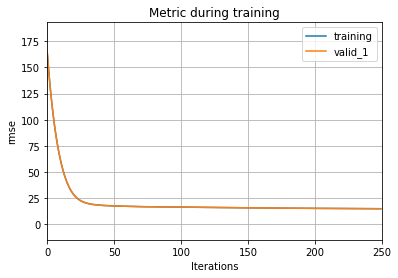

Plotting feature importances...


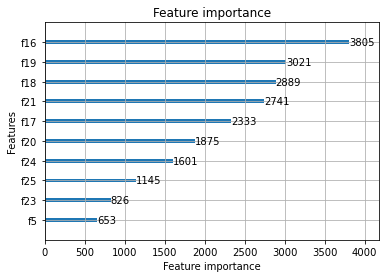

Plotting 4th tree...


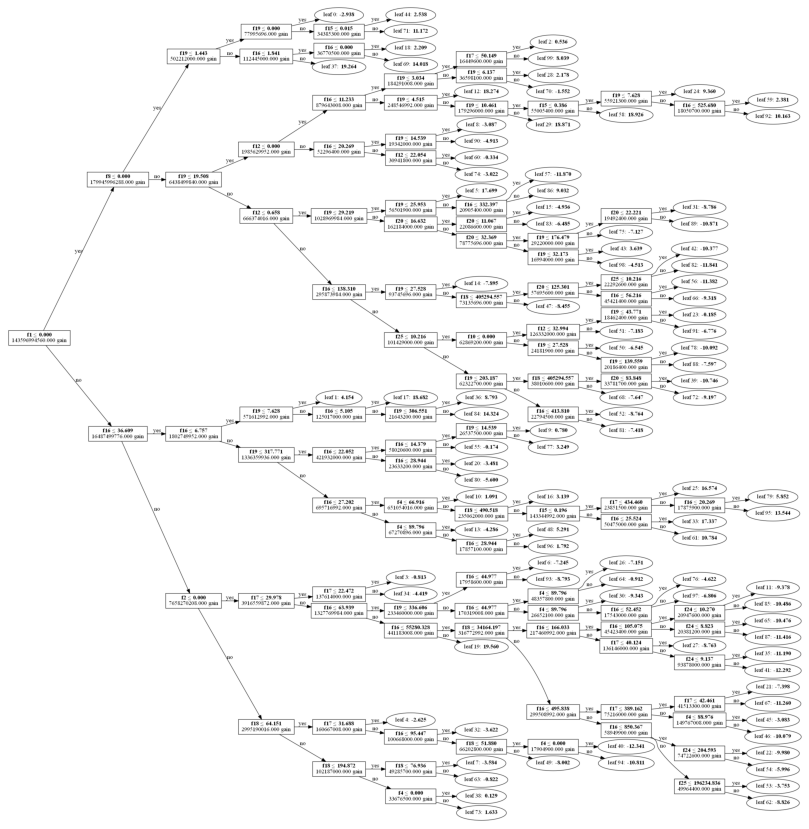

Plotting 4th tree with graphviz...
Save model...
Start prediction...
The RMSE of the predicted result is:
14.901869135251449
The MAE of the predicted result is:
7.702714304471367
End
2022-10-26 02:07:02.121129


In [4]:
################################################################################################################################################
###### Model training ##########################################################################################################################
################################################################################################################################################

print('Loading data...')
X = TREE_2[columns]
y = TREE_2['51_Foerderdruck']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# specify your configurations as a dict
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'rmse', 'auc'},
    'max_depth': 10,
    'num_leaves': 100,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

evals_result = {}  # to record eval results for plotting

print('Starting training...')
print(datetime.datetime.now())
# train
gbm = lgb.train(
    params,
    lgb_train,
    num_boost_round=250,
    valid_sets=[lgb_train, lgb_test],
    feature_name=[f'f{i + 1}' for i in range(X_train.shape[-1])],
    callbacks=[
        lgb.record_evaluation(evals_result)
    ]
)

print('Plotting metrics recorded during training...') # Draw the training results
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()

print('Plotting feature importances...') # Painting features in order of importance
ax = lgb.plot_importance(gbm, max_num_features=10)
plt.show()

print('Plotting 4th tree...')  # Draw the 4th of these decision tree
ax = lgb.plot_tree(gbm, tree_index=3, figsize=(15, 15), show_info=['split_gain'])
plt.show()

print('Plotting 4th tree with graphviz...')# export decision tree pdf image to local
graph = lgb.create_tree_digraph(gbm, tree_index=3, name='Tree4')
graph.render(view=True)


# Save model
print('Save model...')
# Save the model to a file
gbm.save_model('model.txt')

# Start prediction
print('Start prediction...')
# Predictions
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Evaluations
# The RMSE of the predicted results is
print('The RMSE of the predicted result is:')
print(mean_squared_error(y_test, y_pred) ** 0.5)
# The MAE of the predicted results is
print('The MAE of the predicted result is:')
print(mean_absolute_error(y_test, y_pred))
print('End')
print(datetime.datetime.now())

Plotting 94th tree...


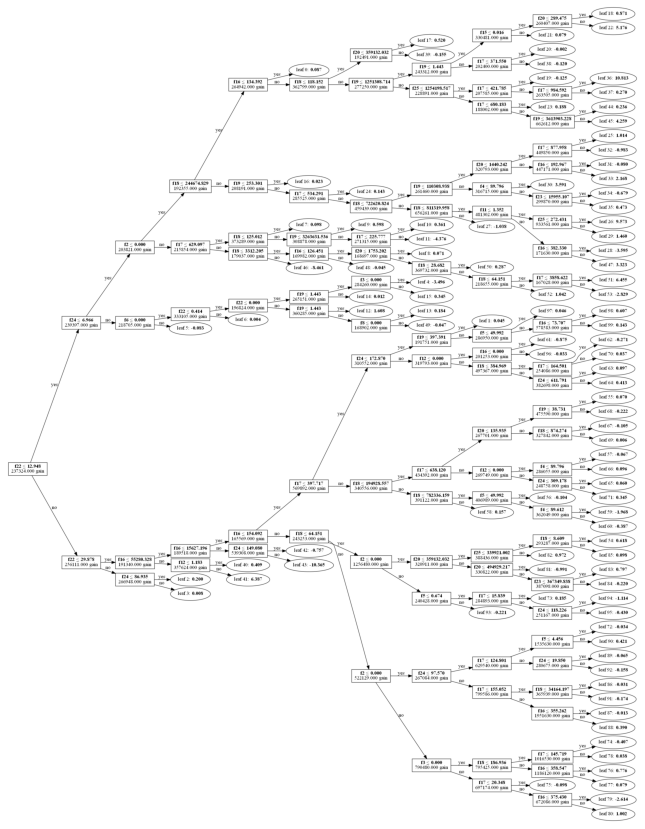

In [12]:
# Draw the 94th of these decision tree
print('Plotting 94th tree...')  
ax = lgb.plot_tree(gbm, tree_index=93, figsize=(15, 15), show_info=['split_gain'])
plt.show()

(-500.0, 20.0)

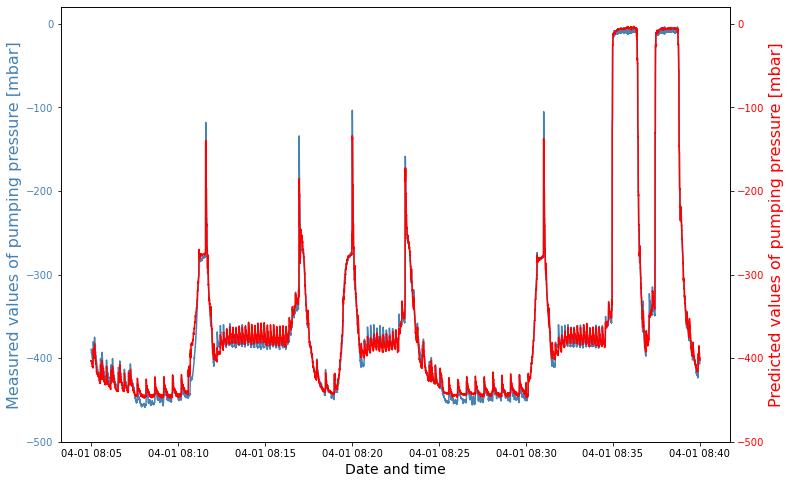

In [11]:
### Draw a comparison figure of the predicted and measured values in validation set

X_test['y_pred'] = y_pred
right = TREE_2['CreateDateTime']
left = X_test
result = pd.merge(left, right, how='left', left_index=True, right_index=True)
result['y_test'] = y_test
result = result.sort_values(by=['CreateDateTime'])

Daten_1 = result
Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-04-01 08:05:00')&(Daten_1['CreateDateTime']<'2020-04-01 08:40:00')]
fig, ax = plt.subplots(figsize=(12, 8))
col1 = 'steelblue'
col2 = 'red'

ax.set_xlabel('Date and time', fontsize=14)
ax.set_ylabel('Measured values of pumping pressure', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))

ax2 = ax.twinx()
ax2.set_ylabel('Predicted values of pumping pressure', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

In [6]:
################################################################################################################################################
###### Predicted pressure values in test set 1#################################################################################################
################################################################################################################################################
### test set 1 : Nov.2020 — Dez.2020
### Test set 1 data pre-processing

ID_51_2020_11 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_51_2020_11.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

### Target variable
TREE_3 = pd.DataFrame()
TREE_4 = pd.DataFrame()
TREE_3 = ID_51_2020_11
TREE_3 = TREE_3.copy()
TREE_3.rename(columns = {'TagValue':'51_Foerderdruck'}, inplace=True)
TREE_3 = TREE_3.drop('TagId',axis = 1)


### Feature merge function  
def zusammen(data,TREE_3):
    data = data[(data['CreateDateTime']>'2020-11-01 00:00:00')&(data['CreateDateTime']<'2020-12-31 23:59:59')]
    data = data.drop('TagId',axis = 1) 
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3

def zusammen_ohneTagId(data,TREE_3):
    data = data[(data['CreateDateTime']>'2020-11-01 00:00:00')&(data['CreateDateTime']<'2020-12-31 23:59:59')]
    TREE_3 = TREE_3.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_3 = TREE_3.reset_index('CreateDateTime')
    return TREE_3


### Filter feature processing
frames = [ID_133_2020.drop('TagId',axis = 1), ID_134_2020.drop('TagId',axis = 1), ID_135_2020.drop('TagId',axis = 1), ID_136_2020.drop('TagId',axis = 1), ID_137_2020.drop('TagId',axis = 1), ID_138_2020.drop('TagId',axis = 1)]
ID_133_bis_138_2020 = pd.concat(frames)
ID_133_bis_138_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_133_bis_138_2020 = ID_133_bis_138_2020.reset_index()
ID_133_bis_138_2020 = ID_133_bis_138_2020.drop('index',axis = 1)

frames = [ID_141_2020.drop('TagId',axis = 1), ID_142_2020.drop('TagId',axis = 1), ID_143_2020.drop('TagId',axis = 1), ID_144_2020.drop('TagId',axis = 1), ID_145_2020.drop('TagId',axis = 1), ID_146_2020.drop('TagId',axis = 1)]
ID_141_bis_146_2020 = pd.concat(frames)
ID_141_bis_146_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_141_bis_146_2020 = ID_141_bis_146_2020.reset_index()
ID_141_bis_146_2020 = ID_141_bis_146_2020.drop('index',axis = 1)


### Turbokonus feature processing  
frames = [ID_139_2020.drop('TagId',axis = 1), ID_140_2020.drop('TagId',axis = 1)]
ID_139_bis_140_2020 = pd.concat(frames)
ID_139_bis_140_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_139_bis_140_2020 = ID_139_bis_140_2020.reset_index()
ID_139_bis_140_2020 = ID_139_bis_140_2020.drop('index',axis = 1)

frames = [ID_147_2020.drop('TagId',axis = 1), ID_148_2020.drop('TagId',axis = 1)]
ID_147_bis_148_2020 = pd.concat(frames)
ID_147_bis_148_2020.sort_values(by=['CreateDateTime'],inplace=True)
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop_duplicates(subset=['CreateDateTime','TagValue'])
ID_147_bis_148_2020 = ID_147_bis_148_2020.reset_index()
ID_147_bis_148_2020 = ID_147_bis_148_2020.drop('index',axis = 1)


### Feature Merge
TREE_3 = zusammen(ID_85_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'85_Eckventil_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_45_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'45_Laufmeldung-Vibrationssieb_BB-8.1'}, inplace=True)
TREE_3 = zusammen(ID_13_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'13_Vollmelder_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_70_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'70_Hertz-Schleuse_ABS-8.1'}, inplace=True)
TREE_3 = zusammen(ID_72_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'72_Hertz-Schleuse_BB-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_133_bis_138_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'133-138_Filterabreinigung_ABS-8.1'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_139_bis_140_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'139-140_Turbokonus Eckventile_ABS-8.1'}, inplace=True)

TREE_3 = zusammen(ID_86_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'86_Eckventil_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_48_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'48_Laufmeldung-Vibrationssieb_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_17_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'17_Vollmelder_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_71_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'71_Hertz-Schleuse_ABS-8.2'}, inplace=True)
TREE_3 = zusammen(ID_73_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'73_Hertz-Schleuse_BB-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_141_bis_146_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'141-146_Filterabreinigung_ABS-8.2'}, inplace=True)
TREE_3 = zusammen_ohneTagId(ID_147_bis_148_2020,TREE_3)
TREE_3.rename(columns = {'TagValue':'147-148_Turbokonus-Eckventile_ABS-8.2'}, inplace=True)


TREE_3['85_Eckventil_ABS-8.1'] = TREE_3['85_Eckventil_ABS-8.1'].fillna(method = "ffill")
TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'] = TREE_3['45_Laufmeldung-Vibrationssieb_BB-8.1'].fillna(method = "ffill")
TREE_3['13_Vollmelder_ABS-8.1'] = TREE_3['13_Vollmelder_ABS-8.1'].fillna(method = "ffill")
TREE_3['70_Hertz-Schleuse_ABS-8.1'] = TREE_3['70_Hertz-Schleuse_ABS-8.1'].fillna(method = "ffill")
TREE_3['72_Hertz-Schleuse_BB-8.1'] = TREE_3['72_Hertz-Schleuse_BB-8.1'].fillna(method = "ffill")
TREE_3['133-138_Filterabreinigung_ABS-8.1'] = TREE_3['133-138_Filterabreinigung_ABS-8.1'].fillna(method = "ffill")
TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'] = TREE_3['139-140_Turbokonus Eckventile_ABS-8.1'].fillna(method = "ffill")
TREE_3['CreateDateTime_Differenz'] = TREE_3['CreateDateTime'].diff().dt.total_seconds()

TREE_3['86_Eckventil_ABS-8.2'] = TREE_3['86_Eckventil_ABS-8.2'].fillna(method = "ffill")
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(0,limit=1)
TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'] = TREE_3['48_Laufmeldung-Vibrationssieb_ABS-8.2'].fillna(method = "ffill")
TREE_3['17_Vollmelder_ABS-8.2'] = TREE_3['17_Vollmelder_ABS-8.2'].fillna(method = "ffill")
TREE_3['71_Hertz-Schleuse_ABS-8.2'] = TREE_3['71_Hertz-Schleuse_ABS-8.2'].fillna(method = "ffill")
TREE_3['73_Hertz-Schleuse_BB-8.2'] = TREE_3['73_Hertz-Schleuse_BB-8.2'].fillna(method = "ffill")
TREE_3['141-146_Filterabreinigung_ABS-8.2'] = TREE_3['141-146_Filterabreinigung_ABS-8.2'].fillna(method = "ffill")
TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'] = TREE_3['147-148_Turbokonus-Eckventile_ABS-8.2'].fillna(method = "ffill")


### Making judgments about excessive downtime
TREE_3.loc[TREE_3['CreateDateTime_Differenz'] > 3600]

def NaNjgtc(data):
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'133-138_Filterabreinigung_ABS-8.1'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data.loc[(data['CreateDateTime_Differenz'] > 3600),'141-146_Filterabreinigung_ABS-8.2'] = data.loc[(data['CreateDateTime_Differenz'] > 3600),'51_Foerderdruck'].fillna(0)
    data['timestamp'] = data['CreateDateTime'].values.astype(np.int64) // 10 ** 6
    s = data.set_index('timestamp')['51_Foerderdruck'].interpolate(method='index',inpalce=True)
    data = pd.merge(left=data, right=s, on=['timestamp'])
    data['51_Foerderdruck_x'] = data['51_Foerderdruck_y']
    data = data.drop('51_Foerderdruck_y',axis=1)
    data = data.drop('timestamp',axis=1)
    data = data.copy()
    data.rename(columns = {'51_Foerderdruck_x':'51_Foerderdruck'}, inplace=True)
    return data

TREE_4 = NaNjgtc(TREE_3)

### Construct new lag time features
# Sensor 85 forward and reverse timing, sensor 45 forward timing
gh = pd.DataFrame()
gh['CreateDateTime'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_0'] = ID_85_2020['CreateDateTime']
gh['CreateDateTime_85_1'] = ID_85_2020['CreateDateTime']
gh['TagValue'] = ID_85_2020['TagValue']
gh['TagId'] = ID_85_2020['TagId']
er = pd.DataFrame()
er['CreateDateTime'] = ID_45_2020['CreateDateTime']
er['CreateDateTime_45_0'] = ID_45_2020['CreateDateTime']
er['TagValue'] = ID_45_2020['TagValue']
er['TagId'] = ID_45_2020['TagId']

TREE_4 = zusammen(gh,TREE_4)
TREE_4['CreateDateTime_85_0'] = TREE_4['CreateDateTime_85_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_85_1'] = TREE_4['CreateDateTime_85_1'].fillna(method = "bfill")
TREE_4['deltatime_85_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_85_0'] 
TREE_4['deltatime_85_0'] = TREE_4['deltatime_85_0'].dt.total_seconds()
TREE_4['deltatime_85_1'] = TREE_4['CreateDateTime_85_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_85_1'] = TREE_4['deltatime_85_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_85_1',axis = 1)
TREE_4 = zusammen(er,TREE_4)
TREE_4['CreateDateTime_45_0'] = TREE_4['CreateDateTime_45_0'].fillna(method = "ffill")
TREE_4['deltatime_45_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_45_0'] 
TREE_4['deltatime_45_0'] = TREE_4['deltatime_45_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_45_0',axis = 1)

#Sensor 86 forward and reverse timing, sensor 48 forward timing
gh1 = pd.DataFrame()
gh1['CreateDateTime'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_0'] = ID_86_2020['CreateDateTime']
gh1['CreateDateTime_86_1'] = ID_86_2020['CreateDateTime']
gh1['TagValue'] = ID_86_2020['TagValue']
gh1['TagId'] = ID_86_2020['TagId']
er1 = pd.DataFrame()
er1['CreateDateTime'] = ID_48_2020['CreateDateTime']
er1['CreateDateTime_48_0'] = ID_48_2020['CreateDateTime']
er1['TagValue'] = ID_48_2020['TagValue']
er1['TagId'] = ID_48_2020['TagId']

TREE_4 = zusammen(gh1,TREE_4)
TREE_4['CreateDateTime_86_0'] = TREE_4['CreateDateTime_86_0'].fillna(method = "ffill")
TREE_4['CreateDateTime_86_1'] = TREE_4['CreateDateTime_86_1'].fillna(method = "bfill")
TREE_4['deltatime_86_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_86_0'] 
TREE_4['deltatime_86_0'] = TREE_4['deltatime_86_0'].dt.total_seconds()
TREE_4['deltatime_86_1'] = TREE_4['CreateDateTime_86_1'] - TREE_4['CreateDateTime'] 
TREE_4['deltatime_86_1'] = TREE_4['deltatime_86_1'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_0',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_86_1',axis = 1)
TREE_4 = zusammen(er1,TREE_4)
TREE_4['CreateDateTime_48_0'] = TREE_4['CreateDateTime_48_0'].fillna(method = "ffill")
TREE_4['deltatime_48_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_48_0'] 
TREE_4['deltatime_48_0'] = TREE_4['deltatime_48_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_48_0',axis = 1)

#Sensor 133-138 forward timing, sensor 141-146 forward timing
op = pd.DataFrame()
op['CreateDateTime'] = ID_133_bis_138_2020['CreateDateTime']
op['CreateDateTime_133_bis_138_0'] = ID_133_bis_138_2020['CreateDateTime']
op['TagValue'] = ID_133_bis_138_2020['TagValue']
op1 = pd.DataFrame()
op1['CreateDateTime'] = ID_141_bis_146_2020['CreateDateTime']
op1['CreateDateTime_141_bis_146_0'] = ID_141_bis_146_2020['CreateDateTime']
op1['TagValue'] = ID_141_bis_146_2020['TagValue']

TREE_4 = zusammen_ohneTagId(op,TREE_4)
TREE_4['CreateDateTime_133_bis_138_0'] = TREE_4['CreateDateTime_133_bis_138_0'].fillna(method = "ffill")
TREE_4['deltatime_133_bis_138_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_133_bis_138_0'] 
TREE_4['deltatime_133_bis_138_0'] = TREE_4['deltatime_133_bis_138_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_133_bis_138_0',axis = 1)
TREE_4 = zusammen_ohneTagId(op1,TREE_4)
TREE_4['CreateDateTime_141_bis_146_0'] = TREE_4['CreateDateTime_141_bis_146_0'].fillna(method = "ffill")
TREE_4['deltatime_141_bis_146_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_141_bis_146_0'] 
TREE_4['deltatime_141_bis_146_0'] = TREE_4['deltatime_141_bis_146_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_141_bis_146_0',axis = 1)

# Sensor 139-140 forward timing, sensor 147-148 forward timing
nm = pd.DataFrame()
nm['CreateDateTime'] = ID_139_bis_140_2020['CreateDateTime']
nm['CreateDateTime_139_bis_140_0'] = ID_139_bis_140_2020['CreateDateTime']
nm['TagValue'] = ID_139_bis_140_2020['TagValue']
nm1 = pd.DataFrame()
nm1['CreateDateTime'] = ID_147_bis_148_2020['CreateDateTime']
nm1['CreateDateTime_147_bis_148_0'] = ID_147_bis_148_2020['CreateDateTime']
nm1['TagValue'] = ID_147_bis_148_2020['TagValue']

TREE_4 = zusammen_ohneTagId(nm,TREE_4)
TREE_4['CreateDateTime_139_bis_140_0'] = TREE_4['CreateDateTime_139_bis_140_0'].fillna(method = "ffill")
TREE_4['deltatime_139_bis_140_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_139_bis_140_0'] 
TREE_4['deltatime_139_bis_140_0'] = TREE_4['deltatime_139_bis_140_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_139_bis_140_0',axis = 1)
TREE_4 = zusammen_ohneTagId(nm1,TREE_4)
TREE_4['CreateDateTime_147_bis_148_0'] = TREE_4['CreateDateTime_147_bis_148_0'].fillna(method = "ffill")
TREE_4['deltatime_147_bis_148_0'] = TREE_4['CreateDateTime'] - TREE_4['CreateDateTime_147_bis_148_0'] 
TREE_4['deltatime_147_bis_148_0'] = TREE_4['deltatime_147_bis_148_0'].dt.total_seconds()
TREE_4 = TREE_4.drop('TagValue',axis = 1)
TREE_4 = TREE_4.drop('CreateDateTime_147_bis_148_0',axis = 1)

# Timestamp
TREE_4=TREE_4.copy()
TREE_4['timestamp'] = TREE_4['CreateDateTime'].values.astype(np.int64) // 10 ** 6 

In [66]:
### Add predicted pressure values in test set 1 
TREE_4 = TREE_4.dropna()
TREE_4 = TREE_4.reset_index(drop=True)
columns = [col for col in TREE_4.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
X_test_11 = TREE_4.drop('timestamp',axis = 1)
X_test_11 = X_test_11.drop('CreateDateTime',axis = 1)
X_test_11 = X_test_11.drop('51_Foerderdruck',axis = 1)
y_pred_11 = bst.predict(X_test_11)
X_test_11['y_pred_11'] = y_pred_11
left_11 = X_test_11
right_11 = TREE_4['CreateDateTime']
result_11 = pd.merge(left_11, right_11, how='left', left_index=True, right_index=True)
result_11['y_test_11'] = TREE_4['51_Foerderdruck']
result_11

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred_11,CreateDateTime,y_test_11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,102.864,44.235,0.000,20.656,9.204,166.549,417.073,-421.131183,2020-11-20 16:12:18.660,-444.732422
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.067,44.032,0.203,20.859,9.407,166.752,417.276,-421.276015,2020-11-20 16:12:18.863,-444.444490
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.271,43.828,0.407,21.063,9.611,166.956,417.480,-421.276015,2020-11-20 16:12:19.067,-446.180600
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.475,43.624,0.611,21.267,9.815,167.160,417.684,-421.276015,2020-11-20 16:12:19.271,-445.023190
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,103.676,43.423,0.812,21.468,0.000,167.361,417.885,-418.869615,2020-11-20 16:12:19.472,-445.596198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5906385,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.563,0.007,1010490.727,280712.378,998719.898,280702.106,1000523.092,-243.585518,2020-12-15 14:55:19.374,0.000000
5906386,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.564,0.006,1010490.728,280712.379,998719.899,280702.107,1000523.093,-243.585518,2020-12-15 14:55:19.375,0.000000
5906387,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.568,0.002,1010490.732,280712.383,0.000,280702.111,0.000,-206.637870,2020-12-15 14:55:19.379,0.000000
5906388,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,999950.569,0.001,1010490.733,280712.384,0.000,280702.112,0.001,-205.659612,2020-12-15 14:55:19.380,0.000000


(-500.0, 20.0)

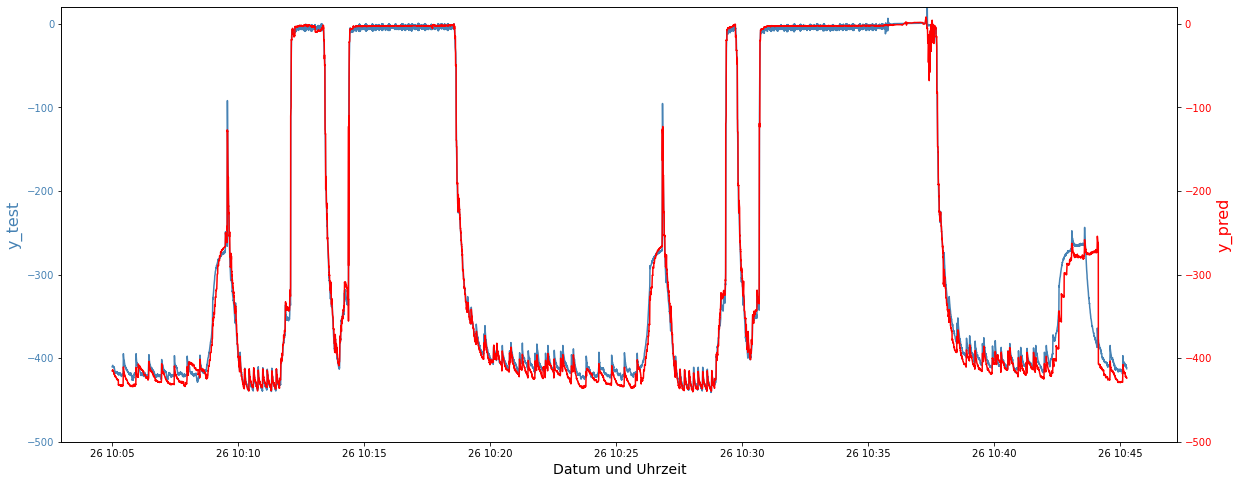

In [76]:
### Draw a comparison figure of the predicted and measured values in test set 1
Daten_1 = result_11
Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2020-11-26 10:05:00')&(Daten_1['CreateDateTime']<'2020-11-26 10:45:16')]

fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'

ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('y_test', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_11, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))

ax2 = ax.twinx()
ax2.set_ylabel('y_pred', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_11, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

In [71]:
# Evaluation
# The RMSE of the predicted results of test set 1 is
print('The RMSE of the predicted result is:')
print(mean_squared_error(result_11['y_test_11'], y_pred_11) ** 0.5)
# The MAE of the predicted results of test set 1 is
print('The MAE of the predicted result is:')
print(mean_absolute_error(result_11['y_test_11'], y_pred_11))

The RMSE of the predicted result is:
16.14990108372955
The MAE of the predicted result is:
9.42269697322965


In [3]:
################################################################################################################################################
###### Predicted pressure values in test set 2 #################################################################################################
################################################################################################################################################
### test set 2 : Jan.2021 — Mar.2021
### Test set 2 data pre-processing similar to 1

TREE_4 = pd.DataFrame()
TREE_4 = pd.read_csv(r'D:\留德十年\TUD\ADP\Data\LGBM-test-2021-2.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [8]:
### Add predicted pressure values
columns = [col for col in TREE_4.columns if col not in ['CreateDateTime','timestamp', '51_Foerderdruck']]
X_test_21_01 = pd.DataFrame()
X_test_21_01 = TREE_4.drop('timestamp',axis = 1)
X_test_21_01 = X_test_21_01.drop('CreateDateTime',axis = 1)
X_test_21_01 = X_test_21_01.drop('51_Foerderdruck',axis = 1)
y_pred_21_01 = bst.predict(X_test_21_01)
X_test_21_01['y_pred_21_01'] = y_pred_21_01
left_21_01 = X_test_21_01
right_21_01 = TREE_4['CreateDateTime']
result_21_01 = pd.merge(left_21_01, right_21_01, how='left', left_index=True, right_index=True)
result_21_01['y_test_21_01'] = TREE_4['51_Foerderdruck']
result_21_01

,85_Eckventil_ABS-8.1,45_Laufmeldung-Vibrationssieb_BB-8.1,13_Vollmelder_ABS-8.1,70_Hertz-Schleuse_ABS-8.1,72_Hertz-Schleuse_BB-8.1,133-138_Filterabreinigung_ABS-8.1,139-140_Turbokonus Eckventile_ABS-8.1,86_Eckventil_ABS-8.2,48_Laufmeldung-Vibrationssieb_ABS-8.2,17_Vollmelder_ABS-8.2,...,deltatime_86_0,deltatime_86_1,deltatime_48_0,deltatime_133_bis_138_0,deltatime_141_bis_146_0,deltatime_139_bis_140_0,deltatime_147_bis_148_0,y_pred_21_01,CreateDateTime,y_test_21_01
0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.065,64.897,0.000,16.615,0.627,345.868,160.896,-399.450080,2021-01-15 16:25:03.341,-403.356410
1,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.270,64.692,0.205,16.820,0.832,346.073,161.101,-401.161918,2021-01-15 16:25:03.546,-405.092590
2,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.470,64.492,0.405,17.020,1.032,346.273,161.301,-401.804036,2021-01-15 16:25:03.746,-408.564790
3,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,108.689,64.273,0.624,17.239,1.251,346.492,161.520,-403.515943,2021-01-15 16:25:03.965,-410.300900
4,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,109.100,63.862,1.035,17.650,1.662,346.903,161.931,-404.611583,2021-01-15 16:25:04.376,-412.036990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229912,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,68.931,0.825,22828.252,22.908,8.795,18.821,83.456,-335.506144,2021-02-28 23:49:54.590,-353.009190
11229913,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.136,0.620,22828.457,23.113,9.000,19.026,83.661,-335.663927,2021-02-28 23:49:54.795,-353.587890
11229914,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.344,0.412,22828.665,23.321,9.208,19.234,83.869,-335.121013,2021-02-28 23:49:55.003,-354.166600
11229915,0.0,0.0,0.0,89.797974,0.0,0.0,0.0,1.0,0.0,0.0,...,69.555,0.201,22828.876,23.532,9.419,19.445,84.080,-335.121013,2021-02-28 23:49:55.214,-355.902710


(-500.0, 20.0)

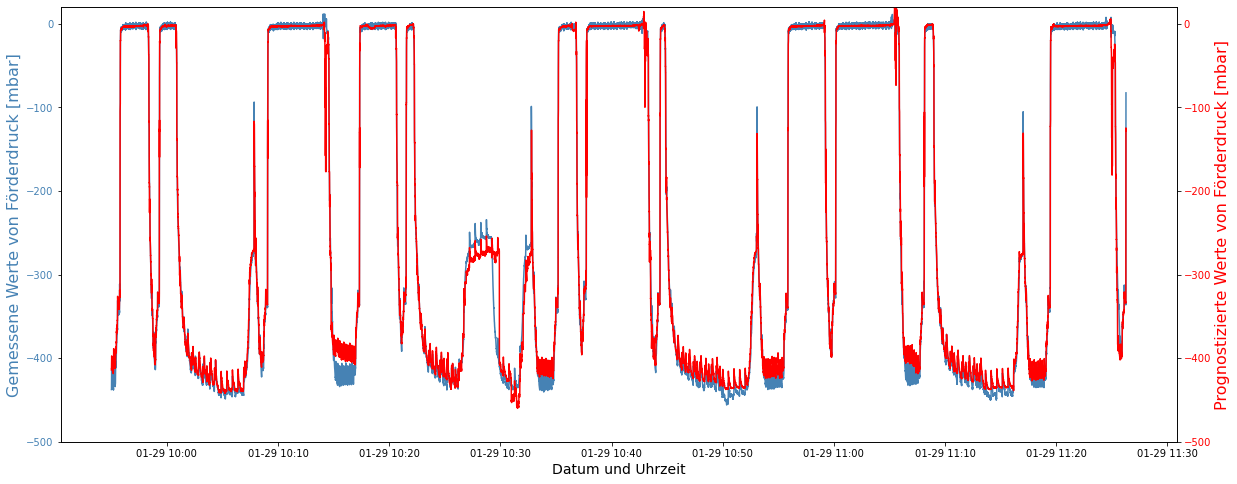

In [17]:
### Draw a comparison figure of the predicted and measured values in test set 2

Daten_1 = result_21_01
Daten_1 = Daten_1[(Daten_1['CreateDateTime']>'2021-01-29 09:55:00')&(Daten_1['CreateDateTime']<'2021-01-29 11:26:16')]

fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'

plt.xticks(pd.date_range('2021-01-29','2021-01-30',freq='10T')) # Horizontal coordinate date range and interval

ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('Gemessene Werte von Förderdruck [mbar]', color=col1, fontsize=16)
ax.plot(Daten_1.CreateDateTime, Daten_1.y_test_21_01, color=col1)
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m-%d %H:%M'))  # Date format of the horizontal label display
ax.tick_params(axis='y', labelcolor=col1)
plt.ylim((-500, 20))

ax2 = ax.twinx()
ax2.set_ylabel('Prognostizierte Werte von Förderdruck [mbar]', color=col2, fontsize=16)
ax2.plot(Daten_1.CreateDateTime, Daten_1.y_pred_21_01, color=col2)
ax2.tick_params(axis='y', labelcolor=col2)
plt.ylim((-500, 20))

In [14]:
# Evaluation
# The RMSE of the predicted results of test set 2 is
print('The RMSE of the predicted result is:')
print(mean_squared_error(result_21_01['y_test_21_01'], y_pred_21_01) ** 0.5)
# The MAE of the predicted results of test set 2 is
print('The MAE of the predicted result is:')
print(mean_absolute_error(result_21_01['y_test_21_01'], y_pred_21_01))

The RMSE of the predicted result is:
17.63019556999533
The MAE of the predicted result is:
10.330018889711843


In [6]:
####################### Tuning of Hyper-parameters  ################################################################################################
####################################################################################################################################################
################### The hyperparameter search process corresponding to the above prediction model is on a remote computer at the fsr institute. 
################### Only the principle is shown here, the resulting optimal hyperparameters are not suitable for the previously trained model.
params = {
    'boosting_type': 'gbdt', 
    'objective': 'regression', 

    'learning_rate': 0.1,
    'max_depth': 10,
    'num_leaves': 100, 

    'subsample': 0.9, 
    'colsample_bytree': 0.8, 
    }
data_train = lgb.Dataset(X_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.647609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2883
[LightGBM] [Info] Number of data points in the train set: 8678132, number of used features: 56
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.603715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2883
[LightGBM] [Info] Number of data points in the train set: 8678132, number of used features: 56
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.597438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2883
[LightGBM] [Info] Num

In [9]:
data_train = lgb.Dataset(X_train, y_train, silent=True)
cv_results = lgb.cv(
    params, data_train, num_boost_round=1000, nfold=5, stratified=False, shuffle=True, metrics='rmse',
    early_stopping_rounds=50, verbose_eval=50, show_stdv=True, seed=0)

print('best n_estimators:', len(cv_results['rmse-mean']))
print('best cv score:', cv_results['rmse-mean'][-1])

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea

In [12]:
from sklearn.model_selection import GridSearchCV
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=50,
                              learning_rate=0.1, n_estimators=658, max_depth=6,
                              metric='rmse', bagging_fraction = 0.8,feature_fraction = 0.8)

params_test1={
    'max_depth': range(3,8,2),
    'num_leaves':range(30, 170, 30)
}
gsearch1 = GridSearchCV(estimator=model_lgb, param_grid=params_test1, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=4)
gsearch1.fit(X_train, y_train)
gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


({'mean_fit_time': array([54.33246183, 62.09008422, 62.51721845, 64.70394812, 57.49651146,
         72.62355456, 72.47612987, 71.66100492, 72.98710489, 72.35686908,
         63.06642385, 73.22585769, 81.20772004, 81.79421854, 74.56216564]),
  'std_fit_time': array([1.90679137, 3.53224913, 3.15748165, 3.19730099, 0.7335448 ,
         1.38655184, 2.74557235, 3.43441359, 4.26736159, 2.80788373,
         3.5833633 , 2.04230313, 4.47996629, 2.70348484, 8.36773755]),
  'mean_score_time': array([10.66481414, 12.787637  , 12.16178246, 11.75383282, 11.3068418 ,
         17.73625278, 17.82033882, 18.21585469, 18.66942916, 18.0858634 ,
         15.55896468, 24.57637072, 29.9521327 , 29.74860659, 25.02143979]),
  'std_score_time': array([0.61297707, 0.64432069, 0.32351026, 0.10448745, 0.5520979 ,
         0.92430592, 0.86267698, 1.0559586 , 1.09751865, 1.06082314,
         0.76925286, 0.90366698, 1.73093138, 1.22367789, 4.76838994]),
  'param_max_depth': masked_array(data=[3, 3, 3, 3, 3, 5, 5, 5, 